# Ejercicio 4

Tome los puntos de las clases con etiquetas 1 y 2 del dataset3_train. Utilice estos puntos para entrenar un clasificador por Máquina de Soporte Vectorial de margen suave (SVC). Utilice un kernel RBF y como hiperparámetros un valor de C=10, gamma = 0.25. Posteriormente, utilice los puntos del dataset3_test que tienen las etiquetas de clase 1 y 2 para evaluar el clasificador entrenado. Muestre la matriz de confusión asociada a la evaluación de su clasificador y el reporte de clasificación que se obtiene con los puntos de prueba. Añada la matriz de confusión y el reporte de clasificación en su archivo ML_Apellidos_EP1_resulados.PDF (valor 3 puntos).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [ ]:
# Importamos los datos y separamos aquellos que usaremos (con etiqueta 1 o 2)
train = np.genfromtxt('dataset3_train.csv', delimiter=',')
seleccionados = np.array([train.T[2] == 1]) | np.array([train.T[2] == 2])
train = train[seleccionados[0]]
train_X = train.T[0:2].T
train_y = train.T[2].T

test = np.genfromtxt('dataset3_test.csv', delimiter=',')
seleccionados = np.array([test.T[2] == 1]) | np.array([test.T[2] == 2])
test = test[seleccionados[0]]
test_X = test.T[0:2].T
test_y = test.T[2].T

In [ ]:
miSVC = svm.SVC(kernel = "rbf", C=10, gamma = 0.25)
miSVC.fit(train_X, train_y)

predicciones = miSVC.predict(test_X)


In [ ]:
# Imprimimos el reporte de clasificación y la matriz de confusion con ayuda del 
# codigo de ejemplo proporcionado
ytest = test_y
yfit = predicciones

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        67
         2.0       1.00      1.00      1.00        66

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



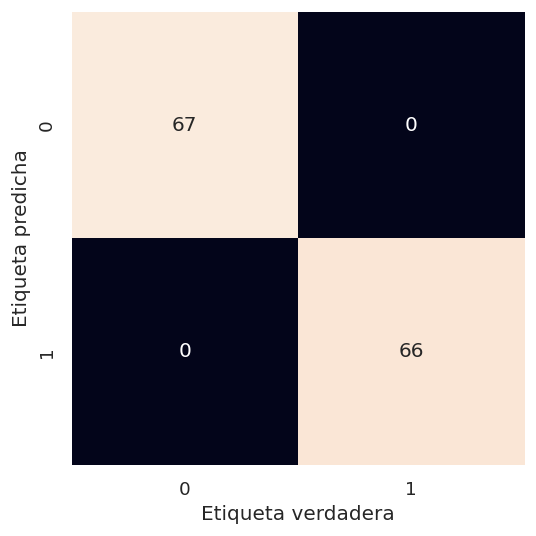

In [ ]:
import seaborn as sns   #Seaborn = Statistical data visualization
sns.set()               #Asigna los valores default de Seaborn plotting
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(8,5), dpi = 120)
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiqueta verdadera')
plt.ylabel('Etiqueta predicha');